# p.75 연습
감독자의 체질검사 데이터를 활용하여 체질 비만도를 예측하기 위한 규제화 회귀분석을 실시하고 결과를 해석하시오.
* 목표변수 FAT(연속형)
* 데이터 비율 train : test = 0.7 : 0.3
* random_state = 1234

# Step 0. 패키지 불러오기

In [1]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# Regression
from statsmodels.formula.api import ols
# qqplot, 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형모델 formula
import statsmodels.formula.api as smf
# 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 데이터 분리
from sklearn.model_selection import train_test_split
# StandardScaler
from sklearn.preprocessing import StandardScaler
# LinearRegression
from sklearn.linear_model import LinearRegression as LR
# Ridge, Lasso, ElasticNet
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

# Step 1. 데이터 구성하기

### 데이터 불러오기

In [3]:
df_raw = pd.read_csv('../0_raw_data/체질검사.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


### 데이터 분리

In [4]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)
# train/test x/y 데이터 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print('train data X size :', df_train_x.shape)
print('train data Y size :', df_train_y.shape)
print('test data X size :', df_test_x.shape)
print('test data Y size :', df_test_y.shape)

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


# Step 2. 규제화 모델 생성

### Ridge

In [5]:
# 모델 생성
ridge = Ridge(random_state = 1234, alpha = 1)
ridge.fit(df_train_x, df_train_y)
# 절편값 확인
print('절편값 :',ridge.intercept_)

절편값 : -36.013578912688416


In [6]:
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({'Coef' : ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

,Coef
AGE,0.064806
WEIGHT,-0.128253
HEIGHT,-0.088214
NECK,-0.406260
CHEST,0.162899
ABDOMEN,0.854771
HIP,-0.143884
THIGH,0.263334
KNEE,-0.132273
ANKLE,0.240906


<AxesSubplot:>

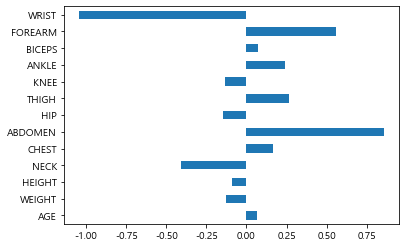

In [7]:
# 회귀계수 그래프
df_ridge_coef.plot.barh(y = 'Coef', legend = False)

In [11]:
# 모델 성능
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print('train data의 결정계수 : {:.4f}'.format(r2_score(df_train_y, train_pred)))
print('test data의 결정계수 : {:.4f}'.format(r2_score(df_test_y, test_pred)))

train data의 결정계수 : 0.7688
test data의 결정계수 : 0.6642


### Lasso

In [12]:
# 모델 생성
lasso = Lasso(random_state = 1234, alpha = 1)
lasso.fit(df_train_x, df_train_y)
# 절편값 확인
print('절편값 :',lasso.intercept_)

절편값 : -39.35090439476541


In [13]:
# 회귀계수 확인
df_lasso_coef = pd.DataFrame({'Coef' : lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

,Coef
AGE,0.016229
WEIGHT,-0.123026
HEIGHT,-0.115243
NECK,-0.000000
CHEST,0.100403
ABDOMEN,0.833549
HIP,-0.000000
THIGH,0.000000
KNEE,-0.000000
ANKLE,0.000000


<AxesSubplot:>

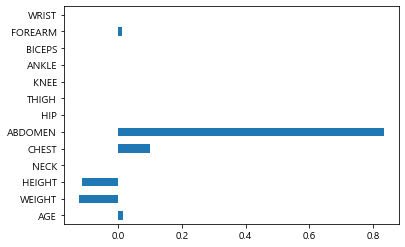

In [14]:
# 회귀계수 그래프
df_lasso_coef.plot.barh(y = 'Coef', legend = False)

In [15]:
# 모델 성능
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print('train data의 결정계수 : {:.4f}'.format(r2_score(df_train_y, train_pred)))
print('test data의 결정계수 : {:.4f}'.format(r2_score(df_test_y, test_pred)))

train data의 결정계수 : 0.7449
test data의 결정계수 : 0.6398


### ElasticNet

In [16]:
# 모델 생성
elasticnet = ElasticNet(random_state = 1234, alpha = 1)
elasticnet.fit(df_train_x, df_train_y)
# 절편 확인
print(elasticnet.intercept_)

-47.008754973997085


In [17]:
# 회귀계수 확인
df_elasticnet_coef = pd.DataFrame({'Coef' : elasticnet.coef_}, index = df_train_x.columns)
df_elasticnet_coef

,Coef
AGE,0.030322
WEIGHT,-0.146414
HEIGHT,-0.114964
NECK,-0.114761
CHEST,0.162783
ABDOMEN,0.808041
HIP,-0.000000
THIGH,0.107365
KNEE,-0.000000
ANKLE,0.000000


<AxesSubplot:>

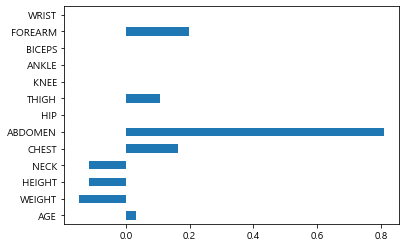

In [18]:
# 회귀계수 그래프
df_elasticnet_coef.plot.barh(y = 'Coef', legend = False)

In [19]:
# 모델 성능
train_pred = elasticnet.predict(df_train_x)
test_pred = elasticnet.predict(df_test_x)
print('train data의 결정계수 : {:.4f}'.format(r2_score(df_train_y, train_pred)))
print('test data의 결정계수 : {:.4f}'.format(r2_score(df_test_y, test_pred)))

train data의 결정계수 : 0.7549
test data의 결정계수 : 0.6367
